# Compute the probability of winning (any amount of money) if 1000 rounds of Roulette are played

- Let $S$ be the amount of winnings in 1000 rounds of Roulette. Note that $S$ is an integer.
- Then the event $S > 0$ is the event that we have **positive winnings**.

## Estimate P(S > 0) using Monte Carlo Simulation

Simulate playing 1000 rounds of Roulette $M$ times, where $M$ is a big integer. (*Note* that $M$ is not 1000. Here, we used $M$ = 10000.)

Then approximate $P(S > 0)$ with:

$$P(S > 0) \approx \frac{1}{M} \sum_{i=1}^M \mathbb{1}_{(0, \infty)}(S_i)$$

where $S$ is a random variable which represents the winnings in 1000 rounds of roulette.

In [1]:
# Simulate game
simulate_games = function(num_rounds, num_mc, population) {
  # Simulate a vector of outcomes
  samps = sample(population, num_rounds * num_mc, replace=TRUE)

  # Put outcomes into a (num_mc x num_rounds) matrix
  matrix(samps, nrow=num_mc, ncol=num_rounds)
}

In [10]:
# Set random number generator seed
set.seed(0)

In [11]:
# Create array of all possible Roulette outcomes (population)
population = c(rep(-1, 37), 35)  # a vector of 37 "-1"s followed by one "35"
population

[1] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
[26] -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 35

In [13]:
# Example game simulation
simulate_games(num_rounds=20, num_mc=5, population=population)

-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,35,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [4]:
# Outcomes: when 1000 games are played
outcomes = simulate_games(num_rounds=1000, num_mc=10000, population=population)

# Look at first 10 game outcomes in 10000 monte carlo simulations
outcomes[1:10, ]

-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,35,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,35,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,35
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,35,-1,35,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,⋯,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


In [5]:
# Get winnings (S) for each game
sum_winnings = rowSums(outcomes)

# Look at first 10 (of 10000) simulated winnings in 1000 rounds.
sum_winnings[1:10]

[1]    8  296  188 -100 -352  -28   44   44  188   44

In [6]:
# Estimated probability of coming out ahead P(S > 0)
mean(sum_winnings > 0)

[1] 0.3955

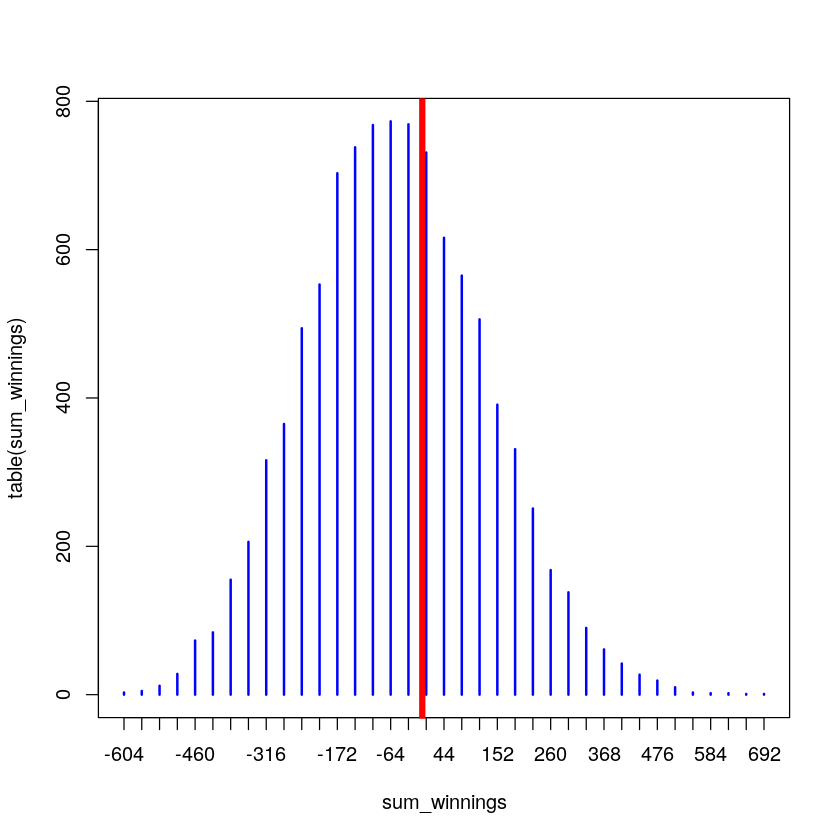

In [7]:
# Plot distribution of winnings, red vertical line indicates 0 winnings.
plot(table(sum_winnings), col='blue')
abline(v=0, lwd=5, col='red')

***

# Q: Is there a number of rounds of Roullete ($n$) you can play such that the probability of having positive winnings $P(S>0)$ is greater than 50%?


In [38]:
# Simulate P(S > 0) for a variety of Roulette rounds (1, 2, ..., 100).
prob_ahead = sapply(1:100, function(n) {
  winnings = simulate_games(num_rounds=n, num_mc=10000, population=population)
  rs = rowSums(winnings)
  mean(rs > 0)
})

# Look at the first 10 values
prob_ahead[1:10]

[1] 0.0259 0.0503 0.0776 0.1009 0.1253 0.1475 0.1781 0.1928 0.2115 0.2335

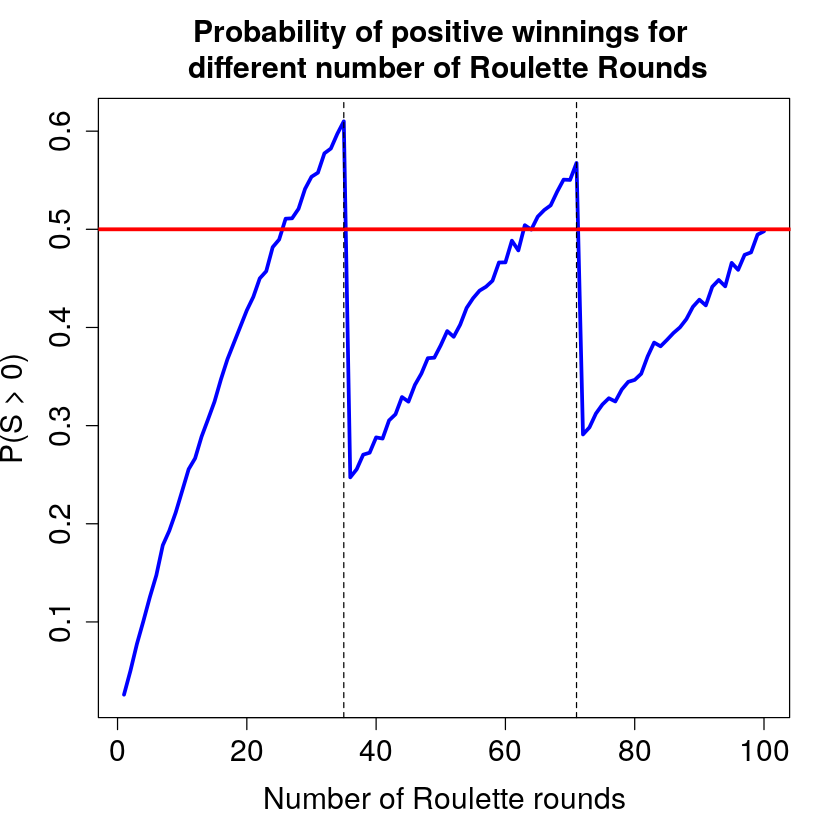

In [39]:
# Plot results
plot(prob_ahead, type='l', col='blue', lwd=3,
     xlab='Number of Roulette rounds', ylab='P(S > 0)',
     main='Probability of positive winnings for \n different number of Roulette Rounds',
     cex.axis=1.5, cex.lab=1.5, cex.main=1.5)
abline(h=1/2, col='red', lwd=3)
abline(v=c(35, 71), lty=2)